In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
from src.utils import *

In [2]:
noise = gpd.read_file('data/NOISE.zip')
districts = gpd.read_file('data/DISTRICTS.zip')
parks = gpd.read_file('data/PARKS.zip')
green_areas = gpd.read_file('data/GREEN_AREAS.zip')
roads = gpd.read_file('data/STREETS.zip')
noise_barriers_1 = gpd.read_file('data/NOISE_BARRIERS.zip')
noise_barriers_2 = gpd.read_file('data/NOISE_BARRIERS_2.zip')

In [3]:
noise_barriers_1.drop(columns='ID_CLONA', inplace=True)
noise_barriers_2.drop(columns='ID_VAL', inplace=True)

In [4]:
noise_barriers = pd.concat([noise_barriers_1, noise_barriers_2]).reset_index(drop = True)

In [63]:
green_df = pd.concat([green_areas[['geometry']], parks[['geometry']]]).reset_index(drop=True)

In [6]:
def create_map(df, column, filename, save=True):
    gdf = df.to_crs(epsg=3857)
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(
        column = column,
        # cmap = 'gray',
        legend=False,
        ax = ax
    )
    ax.set_axis_off()
    
    if save:
        plt.savefig(f'maps/{filename}.png', dpi=300)

    plt.close(fig)
    return fig


def create_map_linestring(data, filename, save=True):
    gdf = data.to_crs(epsg=3857)
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(
        color='black',
        linewidth=2,
        ax=ax
    )
    ax.set_axis_off()
    
    if save:
        plt.savefig(f'maps/{filename}.png', dpi=300)
    
    plt.close(fig)
    return fig

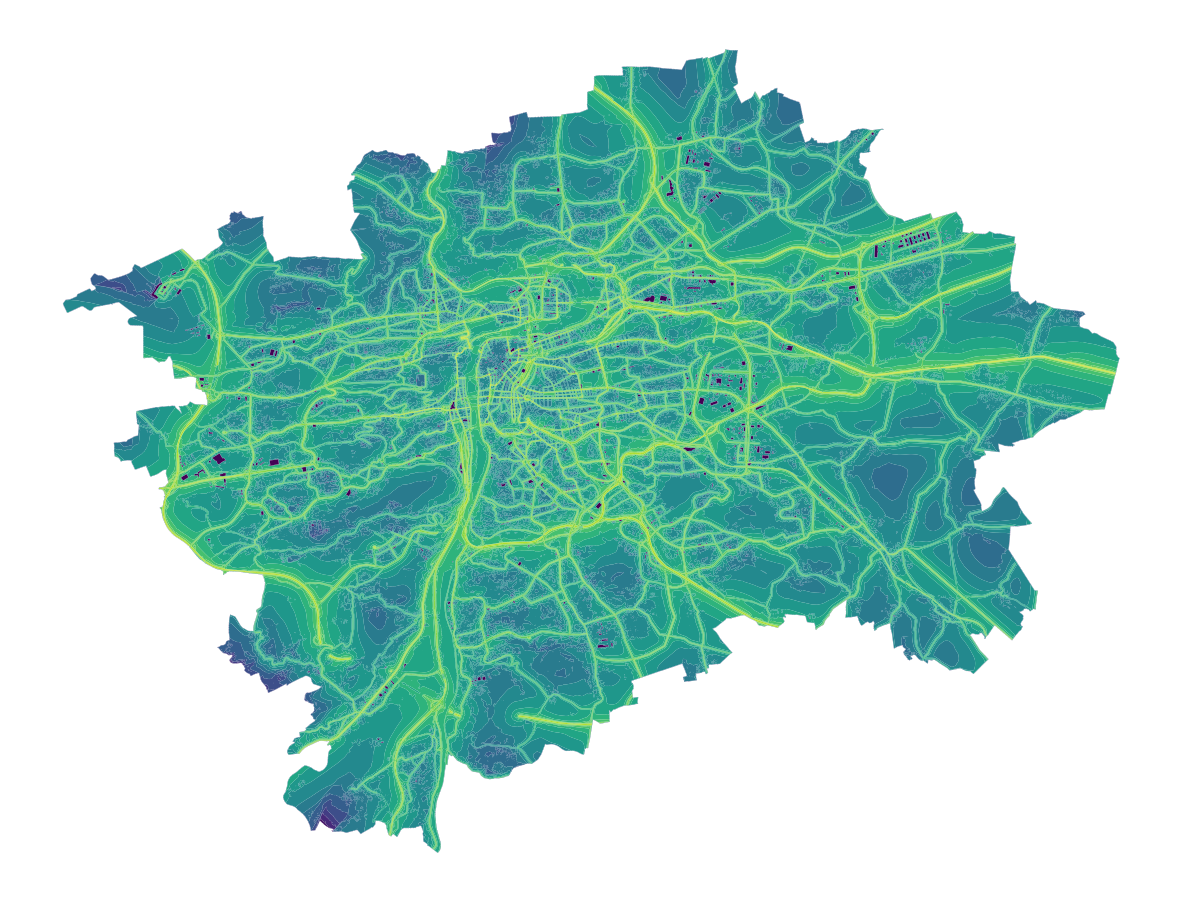

In [60]:
create_map(noise, 'DB_LO', 'noise_low')
create_map(noise, 'DB_HI', 'noise')
create_map_linestring(noise_barriers, 'noise_barriers')
create_map_linestring(roads, 'roads')
create_map(green_df, None, 'green_areas', True)